# **This multi image recognition project aims to accomplish a couple of things.** 

## Build a model that can classify 15 various fruits. These are the steps that would be taken to accomplish that mission

   * Split the large dataset into train, test, validation datasets. 
   * Import the necessary libraries and modules for the project
   * Import the image dataset located in different libraries
   * Build the initial model for the classification
   * Build a callback function that will stop training once validation accuracy reaches 98%
   * Save the model after it has been built for future use. 
   * Import the saved model and run it to verify model was correctly saved
   * Graph the loss and accuracy functions from the training dataset and validation dataset 
   * Use the model to run some predictions to see how well the model can predict fruits with images it has not seen before
   * Future Objectives: This model can be improved by experimenting with HyperParameter tunning to improve model prediction accuracy. 
   * Future Objectives 2: Deploy the model so that other people can upload their own fruit images and get a prediction of what fruit they uploaded. 

Before beginning the project in a python notebook, The dataset was split into train, test, validation dataset using split_folders python package in a python file. 

First, Import different **libraries and modules** that would be needed for the project. 

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

Using TensorFlow backend.


Instantiate the ImageDataGenerator

In [2]:
training_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

Importing the training dataset. The training dataset has 15 different folders. Each folder represent a "category". 
Each category/folder has fruit images for training. When import is done, the output will be how many images are in the training dataset and how many different categories. 

In [3]:
train_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\train"
train_gen = training_datagen.flow_from_directory(train_dir, #directory containing various fruits
                                                target_size=(150, 150), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="categorical") #categorial because of multi-class classification. 
                                                #if only two classes, then "binay"

Found 37608 images belonging to 15 classes.


Importing the validation dataset. The validation dataset has 15 different folders. Each folder represent a "category". 
Each category/folder has fruit images for validation. When import is done, the output will be how many images are in the validation dataset and how many different categories. 

In [4]:
val_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\val"
val_gen = validation_datagen.flow_from_directory(val_dir, #directory containing various fruits
                                                target_size=(150, 150), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="categorical")

Found 8053 images belonging to 15 classes.


Seeing how of each kind of fruit is in the training dataset.

In [6]:
# apple directory
train_apple_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\train\Apple"

# printing the number of apples in train dataset
number_apples_train = len(os.listdir(train_apple_dir))
print("total training apple images:", number_apples_train)

#banana directory
train_banana_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\train\Banana"

# printing the number of bananas in train dataset
number_banana_train = len(os.listdir(train_banana_dir))
print("total training banana images:", number_banana_train)

total training apple images: 4067
total training banana images: 2118


Getting the first 10 names of the images in the training dataset. 

In [7]:
apple_names = os.listdir(train_apple_dir)
apple_names[:10]
banana_names = os.listdir(train_banana_dir)
banana_names[:10]

['79Banana02063.png',
 '87Banana02109.png',
 'Banana01.png',
 'Banana010.png',
 'Banana0100.png',
 'Banana01001.png',
 'Banana01002.png',
 'Banana01004.png',
 'Banana01006.png',
 'Banana01007.png']

Print some images from the dataset to get a preview of what they look like. 

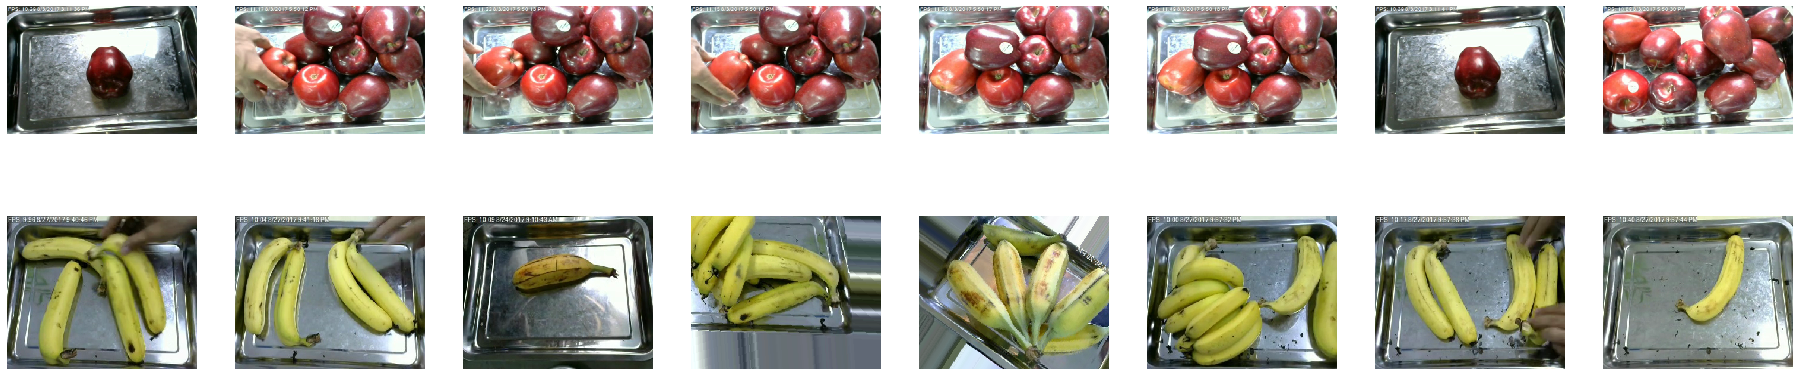

In [8]:
# objective is to print images to get a preview. 

# parameters for the graph. The images will be in a 4x4 configuration
nrows = 8
ncols = 8

pic_index = 0 #index for iterating over images

#set up matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

apple_pic = [os.path.join(train_apple_dir, fname) for fname in apple_names[pic_index-8:pic_index]]
banana_pic = [os.path.join(train_banana_dir, fname) for fname in banana_names[pic_index-8:pic_index]]

for i, img_path in enumerate(apple_pic + banana_pic):
    # setting up subplot. subplots start at index 1
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("Off") #turning off axis. Don't show axis
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [9]:
# relu means if x>0 return x, else return 0" -- it passes only values that are 0 or greater to the next layer in the network



Building the model with multiple convolutional and MaxPooling Layer before passing it to a Dense neural network layer with 512 neurons. This is the initial model and based on the predictive power of the resulting model, this model will be tweaked. 

In [10]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten before feeding into Dense neural network. 
    tf.keras.layers.Flatten(),
    # 512 neurons in the hidden layer
    tf.keras.layers.Dense(512, activation="relu"),
    # 15 = 15 different categories
    # softmas takes a set of values and effectively picks the biggest one. for example if the output layer has
    # [0.1,0.1,0.5,0.2,0.1], it will take it and turn it into [0,0,1,0,0]
    tf.keras.layers.Dense(15, activation="softmax")
]);

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Getting a summary of the model built above. 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
# Implement a callback function, so that whenever the validation data reaches 98% accuracy, the training will be terminated
# Implement saving the model after every epoch. So that next time, i will just load the model without re-training it.

Implementing a callback function to terminate training once training reaches 98% accuracy for validation data


In [13]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 0.98

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_acc") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

Compiling the model 

In [14]:
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

First, fitting the model to the training dataset, while using a callback function. 

Then saving the model using 2 different methods. 

The first method of saving the file saves the model to a pb file type

while the second method of saving the file saves it to a h5 file method. 

In [18]:
fruit_model = model.fit(train_gen, epochs=100, validation_data=val_gen, verbose=1, 
                                  callbacks = [callbacks], workers=10)

filepath = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\saved_model"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("fruit.h5")

# another way to save a model 
# https://www.tensorflow.org/tutorials/keras/save_and_load

Epoch 1/100
1176/1176 [==============================] - 1019s 866ms/step - loss: 0.6009 - acc: 0.8061 - val_loss: 0.3652 - val_acc: 0.8963
Epoch 2/100
1176/1176 [==============================] - 1014s 862ms/step - loss: 0.1751 - acc: 0.9495 - val_loss: 0.5883 - val_acc: 0.8685
Epoch 3/100
1176/1176 [==============================] - 1126s 957ms/step - loss: 0.1479 - acc: 0.9627 - val_loss: 0.1130 - val_acc: 0.9681
Epoch 4/100
1176/1176 [==============================] - 1002s 852ms/step - loss: 0.1353 - acc: 0.9716 - val_loss: 0.0992 - val_acc: 0.9757
Epoch 5/100
1176/1176 [==============================] - 991s 843ms/step - loss: 0.1398 - acc: 0.9741 - val_loss: 0.3583 - val_acc: 0.9321
Epoch 6/100
1176/1176 [==============================] - 955s 812ms/step - loss: 0.1397 - acc: 0.9770 - val_loss: 0.2232 - val_acc: 0.9688
Epoch 7/100
1176/1176 [==============================] - 1097s 933ms/step - loss: 0.1477 - acc: 0.9790 - val_loss: 0.2215 - val_acc: 0.9672
Epoch 8/100
1176/1176 

Viewing the accuracy histroy record of the training dataset from the model. 

In [19]:
fruit_model.history['acc']

[0.80613166,
 0.94953203,
 0.9626675,
 0.9715752,
 0.97410125,
 0.9769996,
 0.979047,
 0.98181236,
 0.98194534,
 0.98401934,
 0.98375344,
 0.9859604,
 0.9890981,
 0.98835355,
 0.99042755,
 0.9899489,
 0.9897362,
 0.99095935,
 0.992023]

In [20]:
# try to import the model that is saved to make sure it was actually saved. 
# graph the loss function and the accuracy scores 
# use the model to do prediction on a test image to see how the model performs. 

Importing the model saved using .h5 method just to verify that the model was saved correctly. 

in order to use this model, we first have to evaluate an image using the model. For example. 

In [22]:
# loading saved model for verification. 
# loading using two methods. One is using .h5 file and loading using file path. 

# loading using .h5 file
new_fruit_model = tf.keras.models.load_model(
    "fruit.h5",
    custom_objects=None,
    compile=True
)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Printing out the model summary from the saved momdel just to verify that model is successfully saved and loaded correctly

In [24]:
new_fruit_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Loading the second saved model to verify it is saved correctly

In [27]:
model_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\saved_model"

# loading using .h5 file
new_fruit_model_v2 = tf.keras.models.load_model(
    model_dir,
    custom_objects=None,
    compile=True
)


printing the model summary from the second saved model

In [29]:
new_fruit_model_v2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

graphing loss function and accuracy scores of the fruit model 

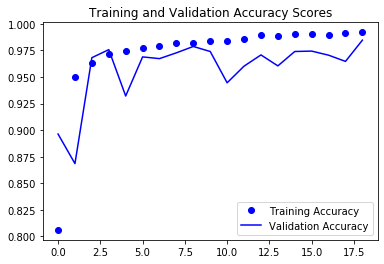

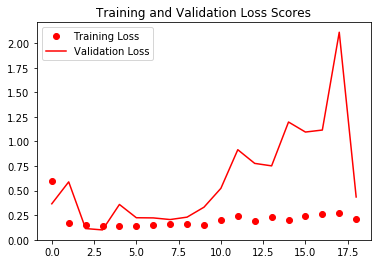

In [31]:
# graphin loss function and accuracy scores of the fruit model 

acc = fruit_model.history['acc'] #training accuracy scores from the model that has been trained
val_acc = fruit_model.history['val_acc'] #validation accuracy scores from the model that has been trained
loss = fruit_model.history['loss'] #training loss scores from the model that has been trained
val_loss = fruit_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy Scores')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss Scores')

plt.legend()

plt.show()


use the model to do prediction on a test image to see how the model performs. 

First, load the test images

Convert the image you are trying to predict into an array of numbers before putting it through the model.predict function
Computers can't see images, what they see is numbers. So, in order for the model to predict what image this is, you first have
to convert that image into numbers which is what computers can read. 

Experimenting with a single apple i

In [51]:
import numpy as np
single_apple = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\test\Apple\15red applee05301.png"

img = image.load_img(single_apple, target_size = (150, 150))
array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)

vimage = np.vstack([x])
model.predict(vimage)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

Experimenting with a single banana image

In [52]:
import numpy as np
single_banana = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\test\Banana\71Banana02034.png"

img = image.load_img(single_banana, target_size = (150, 150))
array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)

vimage = np.vstack([x])
model.predict(vimage)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

Creating a for loop that can classify multiple images stored in a folder

In [71]:
import numpy as np
image_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\testing_images"
img_list = os.listdir(image_dir)

for fruits in img_list:
    path = os.path.join(image_dir, fruits)
    img = image.load_img(path, target_size = (150, 150))
    array = image.img_to_array(img)
    x = np.expand_dims(array, axis=0)

    vimage = np.vstack([x])
    img_classification = model.predict(vimage)
    print(img_classification, fruits)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Apple.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Banana.png
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Carambola.png
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Guava.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Kiwi.png
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Mango.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Muskmelon.png
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] Orange.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Peach.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Pear.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] Persimmon.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Pitaya.png
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Plum.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] Pomegranete.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] Tomatoes.png


Creating a function that can classify multiple images stored in a folder using the for loop defined above. 

In [72]:
def fruit_prediction(image_dir):
    img_list = os.listdir(image_dir)
    for fruits in img_list:
        path = os.path.join(image_dir, fruits)
        img = image.load_img(path, target_size = (150, 150))
        array = image.img_to_array(img)
        x = np.expand_dims(array, axis=0)

        vimage = np.vstack([x])
        img_classification = model.predict(vimage)
        print(img_classification, fruits)

Testing out the fruit prediction function created above. 

In [73]:
fruit_prediction(r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\testing_images")

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Apple.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Banana.png
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Carambola.png
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Guava.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Kiwi.png
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Mango.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Muskmelon.png
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] Orange.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Peach.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Pear.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] Persimmon.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Pitaya.png
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Plum.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] Pomegranete.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] Tomatoes.png


loading the .pb saved model again

In [75]:
model_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\saved_model"

# loading using .h5 file
new_fruit_model_v2 = tf.keras.models.load_model(
    model_dir,
    custom_objects=None,
    compile=True
)


loading the validation dataset again

In [103]:
val_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\fruit_split\val"
val_gen = validation_datagen.flow_from_directory(val_dir, #directory containing various fruits
                                                target_size=(150, 150), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="categorical")

Found 8053 images belonging to 15 classes.


Evaluating the .pb saved model using the validation dataset. This has to be done in order to use the model for predictions

In [101]:

loss,acc = new_fruit_model_v2.evaluate(val_gen, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


253/253 - 209s - loss: 0.2556 - acc: 0.9799
Restored model, accuracy: 97.99%


Loading the .h5 model again for it to be evaluated

In [104]:
model_dir = r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\saved_model"

# loading using .h5 file
new_fruit_model = tf.keras.models.load_model(
    "fruit.h5",
    custom_objects=None,
    compile=True
)


Evaluating the .h5 model so that it can be used for prediction.

In [105]:
loss,acc = new_fruit_model.evaluate(val_gen, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

252/252 - 122s - loss: 0.4345 - acc: 0.9846
Restored model, accuracy: 98.46%


using the model saved in .pb format for prediction just to verify that the saved model works as expected. 

In [106]:
def fruit_prediction(image_dir):
    img_list = os.listdir(image_dir)
    for fruits in img_list:
        path = os.path.join(image_dir, fruits)
        img = image.load_img(path, target_size = (150, 150))
        array = image.img_to_array(img)
        x = np.expand_dims(array, axis=0)

        vimage = np.vstack([x])
        img_classification = new_fruit_model.predict(vimage)
        print(img_classification, fruits)

In [107]:
fruit_prediction(r"C:\Users\Samsung\Desktop\fruit_classification\fruit_project\project_fruit\testing_images")

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Apple.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Banana.png
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Carambola.png
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Guava.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Kiwi.png
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Mango.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Muskmelon.png
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] Orange.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Peach.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Pear.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] Persimmon.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Pitaya.png
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Plum.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] Pomegranete.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] Tomatoes.png
